# Importation des bibliothèques nécessaires

In [57]:
import pickle as plk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import pmdarima as pm

# Lecture du dataframe et caractéristiques

In [21]:
#lecture du dataframe
data=pd.read_pickle('Irish_synchrone_sample8_train.pkl')

#data à prédire
data_predict=pd.read_pickle('Irish_synchrone_sample8_to_predict_na.pkl')
data_predict_2=data_predict.copy()

data.tail()

,mean,TempMean,TempMin,TempMax,WindSpeed,WindSpeedMaxS,WindSpeedMaxG,Precip,Time,Posan,Instant
Date,,,,,,,,,,,
2010-12-14 21:30:00,1.023633,36.0,28.4,41.5,6.2,8.0,999.9,0.0,24909,347,43
2010-12-14 22:00:00,0.939915,36.0,28.4,41.5,6.2,8.0,999.9,0.0,24910,347,44
2010-12-14 22:30:00,0.962452,36.0,28.4,41.5,6.2,8.0,999.9,0.0,24911,347,45
2010-12-14 23:00:00,0.816467,36.0,28.4,41.5,6.2,8.0,999.9,0.0,24912,347,46
2010-12-14 23:30:00,0.711098,36.0,28.4,41.5,6.2,8.0,999.9,0.0,24913,347,47


In [22]:
#vérification qu'il n'y a pas de valeurs manquantes
data.isnull().sum().sum()

0

In [23]:
#caractéristique du dataframe, et vérification qu'il n'y a pas de valeurs constantes
data.describe()

,mean,TempMean,TempMin,TempMax,WindSpeed,WindSpeedMaxS,WindSpeedMaxG,Precip,Time,Posan,Instant
count,16608.000000,16608.000000,16608.000000,16608.000000,16608.000000,16608.000000,16608.000000,16608.000000,16608.000000,16608.000000,16608.000000
mean,0.480827,48.001505,40.228595,54.971363,9.440011,15.568226,770.261410,0.071105,16554.424735,173.549133,24.500000
std,0.219321,10.063346,10.507846,10.771505,3.424500,5.006775,412.138683,0.134636,4818.977930,100.155611,13.853816
min,0.146904,22.000000,14.900000,26.600000,3.300000,7.800000,16.900000,0.000000,8210.000000,1.000000,1.000000
25%,0.291503,40.200000,31.800000,46.900000,7.100000,12.000000,999.900000,0.000000,12407.750000,87.000000,12.750000
50%,0.470566,48.850000,40.550000,56.100000,8.900000,15.000000,999.900000,0.000000,16559.500000,173.500000,24.500000
75%,0.606545,56.900000,49.500000,64.400000,11.300000,18.100000,999.900000,0.100000,20711.250000,260.000000,36.250000
max,1.255917,67.100000,60.800000,75.200000,24.600000,36.900000,999.900000,0.790000,24913.000000,347.000000,48.000000


# Présentation des données en graphe

## Consommation électrique moyenne par jour sur l'année

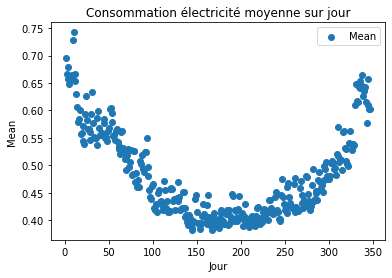

In [24]:
#fonction qui donne un dataframe avec les données du jour t
def chaqueJour_t(t):
    donneesJour_t=data[(data['Posan']==t)]
    return donneesJour_t

#on récupère la colonne mean
mean=data['mean']

mean_mean_list=[]

for i in range(1,348):
    df=chaqueJour_t(i)
    mean_mean=df['mean'].mean()
    mean_mean_list.append(mean_mean)
    
#on définit l'axe des abscisses
Jour=[i for i in range(1,348)]

#tracer de la courbe mean en fonction des jours
plt.scatter(Jour,mean_mean_list,label='Mean')
plt.title('Consommation électricité moyenne sur jour')
plt.xlabel('Jour')
plt.ylabel('Mean')
plt.legend()

## Corrélation entre les températures et visualisation en graphe

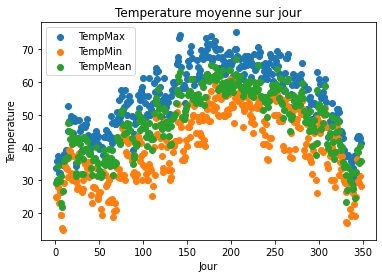

In [25]:
#on évalue la corrélation qu'il y a entre les différentes températures

TempMax=data['TempMax']
TempMin=data['TempMin']
TempMean=data['TempMean']

#fonction qui donne un dataframe avec les données du jour t
def chaqueJour_t(t):
    donneesJour_t=data[(data['Posan']==t)]
    return donneesJour_t

mean_TempMax_list=[]
mean_TempMin_list=[]
mean_TempMean_list=[]

for i in range(1,348):
    df=chaqueJour_t(i)
    mean_TempMax=df['TempMax'].mean()
    mean_TempMin=df['TempMin'].mean()
    mean_TempMean=df['TempMean'].mean()
    mean_TempMax_list.append(mean_TempMax)
    mean_TempMin_list.append(mean_TempMin)
    mean_TempMean_list.append(mean_TempMean)
    

#on trace les 3 nuages de points sur le même graphe
plt.scatter(Jour,mean_TempMax_list,label='TempMax')
plt.scatter(Jour,mean_TempMin_list,label='TempMin')
plt.scatter(Jour,mean_TempMean_list,label='TempMean')
plt.title('Temperature moyenne sur jour')
plt.xlabel('Jour')
plt.ylabel('Temperature')
plt.legend()

## Comparaison de la consommation moyenne par instant sur l'été et sur l'hiver

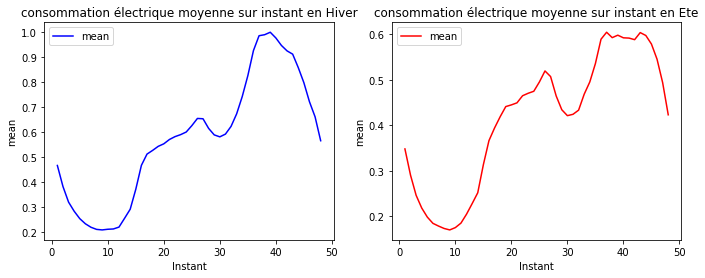

In [74]:
#fonction qui donne un dataframe avec tous les instants i pour les jours d'hiver
def chaqueJourInstantHiver_t(t):
    donneesInstant_t=data[(data['Instant']==t) & (data['Posan']<=81)]
    return donneesInstant_t

#fonction qui donne un dataframe avec tous les instants i pour les jours d'été
def chaqueJourInstantEte_t(t):
    donneesInstant_t=data[(data['Instant']==t) & (data['Posan']>=171) & (data['Posan']<=262)]
    return donneesInstant_t

#listes des moyennes sur tous les jours d'été et d'hiver pour chaque instant 
mean_mean_Hiver=[]
mean_mean_Ete=[]

for i in range(1,49):
    df1=chaqueJourInstantHiver_t(i)
    df2=chaqueJourInstantEte_t(i)
    mean_mean1=df1['mean'].mean()
    mean_mean2=df2['mean'].mean()
    mean_mean_Hiver.append(mean_mean1)
    mean_mean_Ete.append(mean_mean2)
    
#définition de l'intervalle instant pour l'abscisse
Instant=[i for i in range(1,49)]

plt.subplot(1, 2, 1)
plt.plot(Instant,mean_mean_Hiver,label='mean', color='b')
#plt.title(f'consommation électrique moyenne sur instant en Hiver ')
plt.xlabel('Instant')
plt.ylabel('mean')
plt.title('consommation électrique moyenne sur instant en Hiver')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Instant, mean_mean_Ete, label='mean', color='r')
plt.title('consommation électrique moyenne sur instant en Ete')
plt.xlabel('Instant')
plt.ylabel('mean')
plt.gcf().subplots_adjust( right = 1.6)
plt.legend()
plt.show()
    

Petites remarques :

-La consommation électrique en moyenne est presque divisée par 2 entre un jour en été et un jour en hiver. 
-On repère bien les périodes de la journée avec un pic vers la soirée quand les gens rentrent chez eux. 

# Estimation de l'intercorrélation entre les paramètres

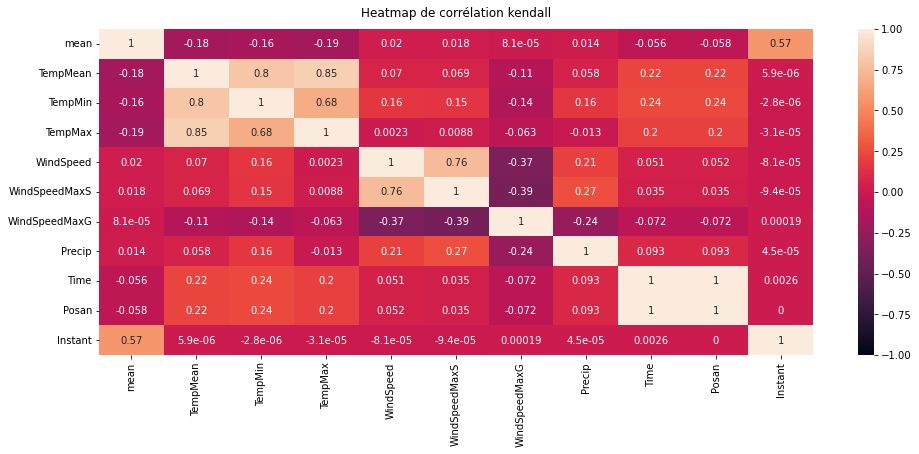

In [27]:
# Augmentation de la taille de la heatmap
plt.figure(figsize=(16, 6))

# On stocke l'objet heatmap dans une variable
# On met les annotations pour avoir les valeurs qui vont de -1 à 1
heatmap_kendall = sns.heatmap(data.corr(method='kendall'), vmin=-1, vmax=1, annot=True)

# On donne un titre et ajuste sa distance à la heatmap
heatmap_kendall.set_title('Heatmap de corrélation kendall', fontdict={'fontsize':12}, pad=12);

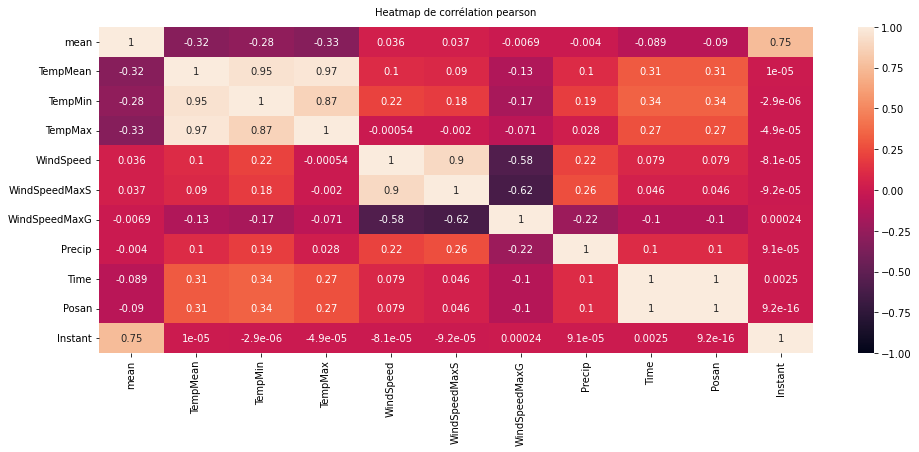

In [28]:
#on essaie un autre modèle
plt.figure(figsize=(16, 6))
heatmap_pearson = sns.heatmap(data.corr(method='pearson'), vmin=-1, vmax=1, annot=True)
heatmap_pearson.set_title('Heatmap de corrélation pearson', fontdict={'fontsize':10}, pad=12);

## Remarques

On a utilisé deux modèles pour la corrélation
-Pearson : corrélation entre deux variables dépendantes linéairement l'une de l'autre
-Kendall : corrélation pour deux variables sans modéle de dépendance a priorio
(pas de spearman car pas de qualitatif dans les données)
    
on remarque une corrélation importante entre la consommation d'électricité et quelques paramètres 
comme la température, l'instant et la vitesse du vent 

On a une corrélation importante entre les températures ce qui permet d'en garder qu'une seule

On a une corrélation importante entre les vitesses de vent ce qui permet d'en garder qu'une seule

La corrélation est assez faible avec Time et Posan qui évoluent de manière croissante et non cyclique comme la météo.
Cela nous mène à garder en paramètres Instant, TempMax et WindSpeed

Enfin, il faut tout de même nuancer le modèle puisque c'est une corrélation linéaire, donc le dataframe peut suivre d'autres types de modèles pour lesquels une corrélation serait plus importante. 

## Remarques : 

-on retrouve les mêmes tendances sur la mse et le r2 pour les différents modèles utilisés
cela rend difficile l'idée de départ de traiter les instants présentant une mauvaise erreur avec un modèle différent

-on remarque aussi que partititionner en instant n'est pas très partinent car on regarde sur une année et l'on sait que les 
consommations ne sont pas les mêmes en hiver et en été. La plus grande erreur est obtenue 
pour les heures du soir (heures pour lesquelles il y a la plus grande différence de consommation 
d'électrcité entre été et hiver donc c'était attendu

-on a un r2 qui est négatif pour certains modèles ce qui traduit un modèle linéaire plus pertinent pour ces instants

## Prédiction avec le modèle SARIMAX
ON essaye ici de prédire les prmeiers jours de tests avec un modèle SARIMAX : analyse par série temporelle avec la TempMean comme variable exogène.


In [ ]:
SARIMAX_model = pm.auto_arima(data[['mean']][len(data)-140:len(data)], exogenous=data[['TempMean']][len(data)-140:len(data)],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1,
                           trace=False,
                           error_action='ignore', 
                           suppress_warnings=True,
                           stepwise=True)



def sarimax_forecast(SARIMAX_model, periods=1):
    # Forecast
    n_periods = periods

    forecast_df = pd.DataFrame({"month_index":pd.date_range(data[len(data)-140:len(data)].index[-1], periods = n_periods, freq='MS').month},
                    index = pd.date_range(data[len(data)-140:len(data)].index[-1], periods = n_periods, freq='MS'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods,
                                            return_conf_int=True,
                                            exogenous=forecast_df[['month_index']])
    index_of_fc = pd.date_range(data[len(data)-140:len(data)].index[-1], periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(data['mean'][len(data)-140:len(data)], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color='k', alpha=.15)

    plt.title("ARIMA - Forecast of mean")
    plt.show()

sarimax_forecast(SARIMAX_model, periods=1)

# Modèles de Régression

On utilise tout le dataframe en gardant les paramètre intéressants. On fait ensuite tourner plusieurs modèles de régression et on les évalue afin de déterminer lequel est le meilleur pour prédire les données

In [104]:
#1er modèle : KNN

#On garde ici les paramètres les plus intéressants pour le modèle
X=data[['TempMax','Instant','WindSpeed']]
y=data['mean']

#On sépare nos données en entrainement et en test, sans aléatoire, on garde l'ordre des données

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,shuffle=False)

#on fait tourner un modèle KNN
model_knn=KNeighborsRegressor()
model_knn.fit(X_train,y_train)
Y_predict=model_knn.predict(X_test)

print('MSE : ',mean_squared_error(y_test,Y_predict))
print('Le score est de : ',model_knn.score(X_test,y_test))



MSE :  0.008265479232444112
Le score est de :  0.8674077258502262


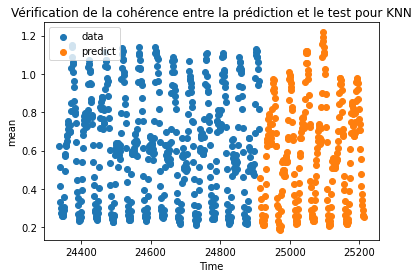

In [100]:
#test du modèle et cohérence de la prédiction

df_knn=data[data['Posan']>340]

#on va tracer 'mean' sur la journée, donc en fonction des 'Time'
Abscisse=df['Time'].values.reshape(-1,1)
donnes_test=df[['TempMax','Instant','WindSpeed']]
resultats_test=df['mean'].values.reshape(-1,1)

plt.scatter(Abscisse,resultats_test,label='data')
plt.title("Vérification de la cohérence entre la prédiction et le test pour KNN")


#on trace maintenant la prédiction du modèle KNN

abscisse=data_predict['Time'][1:300].values.reshape(-1,1)
resultat_predict=model_knn.predict(data_predict[['TempMax','Instant','WindSpeed']][1:300])

plt.scatter(abscisse,resultat_predict,label='predict')
plt.xlabel('Time')
plt.ylabel('mean')
plt.legend()

In [108]:
#2ème modèle : SVR

X=data[['TempMax','Instant','WindSpeed']]
y=data['mean']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,shuffle=False)

model_svr=SVR()
model_svr.fit(X_train,y_train)
y_predict=model_svr.predict(X_test)

mean_squared_error(y_test,y_predict),model_svr.score(X_test,y_test)

(0.01297148417060703, 0.7919154429028799)

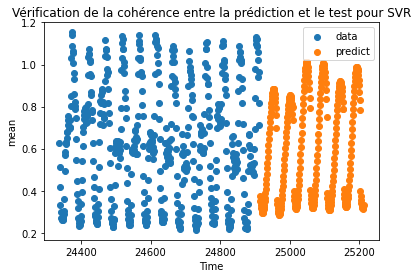

In [106]:
#test du modèle et cohérence de la prédiction

df_svr=data[data['Posan']>340]

#on va tracer 'mean' sur la journée, donc en fonction des 'Time'
Abscisse=df['Time'].values.reshape(-1,1)
donnes_test=df[['TempMax','Instant','WindSpeed']]
resultats_test=df['mean'].values.reshape(-1,1)

plt.scatter(Abscisse,resultats_test,label='data')
plt.title("Vérification de la cohérence entre la prédiction et le test pour SVR")


#on trace maintenant la prédiction du modèle SVR

abscisse=data_predict['Time'][1:300].values.reshape(-1,1)
resultat_predict=model_svr.predict(data_predict[['TempMax','Instant','WindSpeed']][1:300])

plt.scatter(abscisse,resultat_predict,label='predict')
plt.xlabel('Time')
plt.ylabel('mean')
plt.legend()

In [112]:
#3ème modèle : Random forest

X=data[['TempMax','Instant','WindSpeed']]
y=data['mean']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,shuffle=False)

model_forest=RandomForestRegressor()
model_forest.fit(X_train,y_train)
y_predict=model_forest.predict(X_test)

mean_squared_error(y_test,y_predict),model_forest.score(X_test,y_test)




(0.00829437921752173, 0.866944121183567)

Au vu des scores obtenus et des erreurs quadratiques, on décide de retenir pour le test sur une journée le modèle de Random Forest

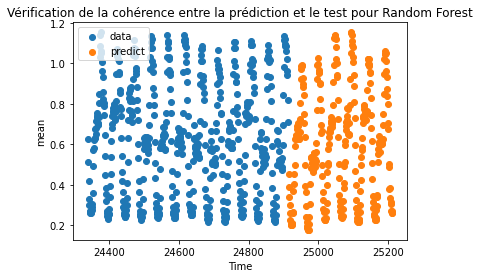

In [111]:
#test du modèle et cohérence de la prédiction

df_forest=data[data['Posan']>340]

#on va tracer 'mean' sur la journée, donc en fonction des 'Time'
Abscisse=df['Time'].values.reshape(-1,1)
donnes_test=df[['TempMax','Instant','WindSpeed']]
resultats_test=df['mean'].values.reshape(-1,1)

plt.scatter(Abscisse,resultats_test,label='data')
plt.title("Vérification de la cohérence entre la prédiction et le test pour Random Forest")


#on trace maintenant la prédiction du modèle KNN

abscisse=data_predict['Time'][1:300].values.reshape(-1,1)
resultat_predict=model_forest.predict(data_predict[['TempMax','Instant','WindSpeed']][1:300])

plt.scatter(abscisse,resultat_predict,label='predict')
plt.xlabel('Time')
plt.ylabel('mean')
plt.legend()

In [62]:
#4ème modèle : regression OLS

X=data[['TempMax','Instant','Precip']]
y=data['mean']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,shuffle=False)


model_ols=sm.OLS(y_train,X_train)
est=model_ols.fit()

print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                   mean   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                          4.395e+04
Date:                Fri, 10 Jun 2022   Prob (F-statistic):                        0.00
Time:                        11:08:55   Log-Likelihood:                          5896.8
No. Observations:               13286   AIC:                                 -1.179e+04
Df Residuals:                   13283   BIC:                                 -1.177e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [63]:
#5ème modèle : arbre de décision

X=data[['TempMax','Instant']]
y=data['mean']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,shuffle=False)

model_tree=DecisionTreeRegressor()
model_tree.fit(X_train,y_train)
y_predict=model_tree.predict(X_test)

mean_squared_error(y_test,y_predict),model_tree.score(X_test,y_test)

(0.008984994081638246, 0.8558654900697885)

Comme dit précédemment, nous allons garder le modèle de Random Forest pour faire la prédiction. Nous nous intéressons alors aux paramètres les plus "importants" de ce modèle

<AxesSubplot:>

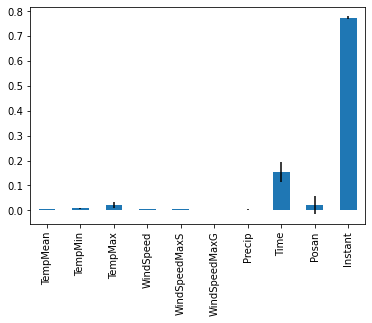

In [64]:
#importances des différents paramètres avec random forest

X=data.drop('mean',axis=1)
y=data['mean']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,shuffle=False)

model_forest_2=RandomForestRegressor()
model_forest_2.fit(X_train,y_train)




importances = model_forest_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_forest_2.estimators_], axis=0)
feature_names = data.drop('mean',axis=1).columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)

# Nouvelle Approche

On décide d'agrandir le dataframe pour affiner la prédiction. Pour cela, on récupère le jeu de données d'iun autre groupe pour simuler l'année suivante et ainsi garder une "continuité" entre la prédiction de décembre et la suite.

C:\Users\adild\AppData\Local\Temp\ipykernel_24620\187258870.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  début['Posan']=a['Posan'].values
C:\Users\adild\AppData\Local\Temp\ipykernel_24620\187258870.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  début['Time']=b['Time'].values


Text(0, 0.5, 'mean')

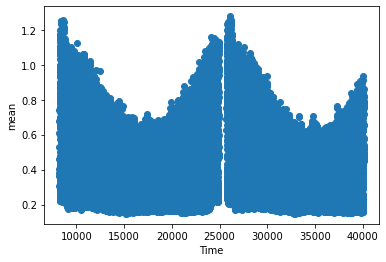

In [76]:
# l'année d'après en utilisant un autre sample
data=pd.read_pickle('Irish_synchrone_sample8_train.pkl')
data_3= pd.read_pickle('Irish_synchrone_sample3_train.pkl')

a=[]
for j in range(300):
    for i in range(48):
       a.append(366+j)
a=pd.DataFrame(a,columns=['Posan'])
b=np.linspace(25730,25730+14399,14400)
b=pd.DataFrame(b,columns=['Time'])

début=data_3[0:14400]


début['Posan']=a['Posan'].values
début['Time']=b['Time'].values


frames = [data, début]
cycle_2 = pd.concat(frames)
plt.scatter(cycle_2['Time'],cycle_2['mean'])
plt.xlabel("Time")
plt.ylabel('mean')


On peut maintenant faire tourner le modèle en prenant cette fois-ci les données du nouveau dataframe pour l'entrainer et le tester.

In [66]:
#prise en compte d'un data frame "cyclique" avec random forest

X=cycle_2[['TempMax','Instant','WindSpeed']]
y=cycle_2['mean']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,shuffle=False)

model_forest_2=RandomForestRegressor()
model_forest_2.fit(X_train,y_train)

y_predict=model_forest_2.predict(X_test)

mean_squared_error(y_test,y_predict),model_forest_2.score(X_test,y_test)






(0.0006855726894869531, 0.9743721685175849)

On remarque ici que le score est grandement augmenté et que l'erreur quadratique moyenne est fortement diminuée.

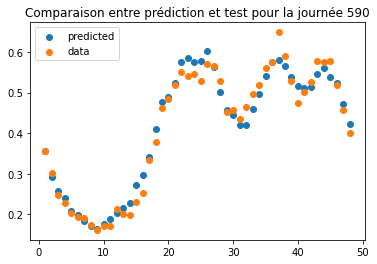

In [67]:
#test du modèle sur les données de test
#On compare la prédiction aux données de test sur une journée classique, ici la journée 590

df=cycle_2[cycle_2['Posan']==590]

Abscisse=df['Instant'].values.reshape(-1,1)
donnes_test=df[['TempMax','Instant','WindSpeed']]
resultats_test=df['mean'].values.reshape(-1,1)

plt.scatter(Abscisse,model_forest_2.predict(donnes_test),label='predicted')
plt.scatter(Abscisse,resultats_test,label='data')
plt.title('Comparaison entre prédiction et test pour la journée 590')
plt.legend()

# Prédiction 

Maintenant que l'on possède un modèl performant, on peut prédire la consommation électrique moyenne sur les 14 derniers jours de l'année. 

In [68]:
#prédictions réelles des valeurs avec le modèle random forest 1 (donnée de train sans cycle)

X_to_predict=data_predict[['TempMax','Instant','WindSpeed']]

Y_to_predict=model_forest.predict(X_to_predict).reshape(-1,1)

data_predict['mean']=Y_to_predict


data_predict

,mean,TempMean,TempMin,TempMax,WindSpeed,WindSpeedMaxS,WindSpeedMaxG,Precip,Time,Posan,Instant
Date,,,,,,,,,,,
2010-12-15 00:00:00,0.548555,38.5,34.0,41.0,8.0,15.9,999.9,0.0,24914,348,48
2010-12-15 00:30:00,0.469550,38.5,34.0,41.0,8.0,15.9,999.9,0.0,24915,348,1
2010-12-15 01:00:00,0.390760,38.5,34.0,41.0,8.0,15.9,999.9,0.0,24916,348,2
2010-12-15 01:30:00,0.339535,38.5,34.0,41.0,8.0,15.9,999.9,0.0,24917,348,3
2010-12-15 02:00:00,0.299673,38.5,34.0,41.0,8.0,15.9,999.9,0.0,24918,348,4
...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 21:30:00,0.911961,44.0,41.0,46.4,3.5,7.0,999.9,0.0,25725,364,43
2010-12-31 22:00:00,0.856204,44.0,41.0,46.4,3.5,7.0,999.9,0.0,25726,364,44
2010-12-31 22:30:00,0.795901,44.0,41.0,46.4,3.5,7.0,999.9,0.0,25727,364,45


Text(0.5, 1.0, 'Prévision sur la journée du 15 décembre \n avec le modèle 1')

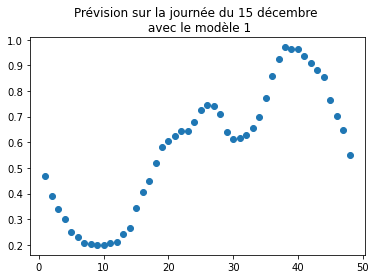

In [69]:
#visualisation sur la journée du 15 décembre

data_visu=data_predict[data_predict['Posan']==348]
X_visu=data_visu['Instant'].values.reshape(-1,1)

X_data=data_visu[['TempMax','Instant','WindSpeed']]
y_predicted=model_forest.predict(X_data)

plt.scatter(X_visu,y_predicted)
plt.title('Prévision sur la journée du 15 décembre \n avec le modèle 1')



In [70]:
#prédiction des valeurs avec le modèle random forest 2 (cycle de 2 ans)



X_to_predict_2=data_predict_2[['TempMax','Instant','WindSpeed']]

Y_to_predict=model_forest_2.predict(X_to_predict_2).reshape(-1,1)

data_predict_2['mean']=Y_to_predict


data_predict_2.to_csv('Prédiction_Groupe8.csv')

Text(0.5, 1.0, 'Prévision sur la journée du 15 décembre \n avec le modèle 2')

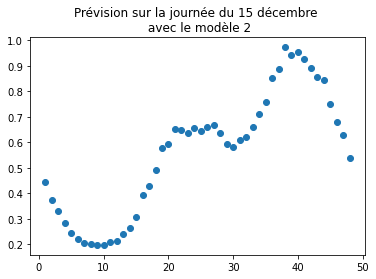

In [71]:
#visualisation

data_visu_2=data_predict_2[data_predict_2['Posan']==348]
X_visu_2=data_visu_2['Instant'].values.reshape(-1,1)

X_data_2=data_visu_2[['TempMax','Instant','WindSpeed']]
y_predicted_2=model_forest_2.predict(X_data_2)

plt.scatter(X_visu_2,y_predicted_2)
plt.title('Prévision sur la journée du 15 décembre \n avec le modèle 2')


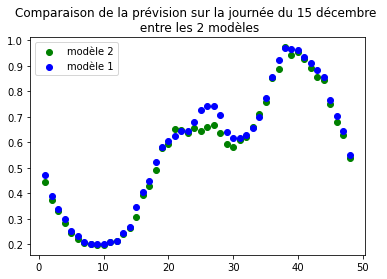

In [72]:
#comparaison des 2 modèles de prédiction

plt.scatter(X_visu_2,y_predicted_2,c='green',label='modèle 2')
plt.scatter(X_visu,y_predicted,c='blue',label='modèle 1')
plt.title('Comparaison de la prévision sur la journée du 15 décembre \n entre les 2 modèles')
plt.legend()


Enfin, on vérifie la cohérence de la prédiction en comparant la journée du 14 décembre à celle du 15 avec le modèle 2.

Text(0.5, 1.0, 'Comparaison entre le 14 décembre et le 15 décembre')

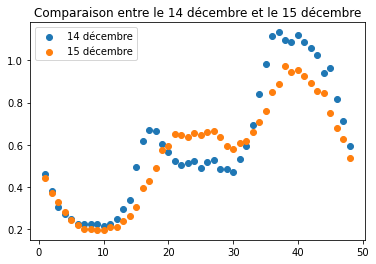

In [73]:
#Consommation du 14 décembre
data_14=cycle_2[cycle_2['Posan']==347]
X_14=data_14['Instant'].values.reshape(-1,1)
y_14=data_14['mean']

data_15=data_predict_2[data_predict_2['Posan']==348]
X_data=data_15[['TempMax','Instant','WindSpeed']]
X_15=data_15['Instant'].values.reshape(-1,1)
y_15=model_forest_2.predict(X_data)

plt.scatter(X_14,y_14,label='14 décembre')
plt.scatter(X_15,y_15,label='15 décembre')
plt.legend()
plt.title('Comparaison entre le 14 décembre et le 15 décembre')

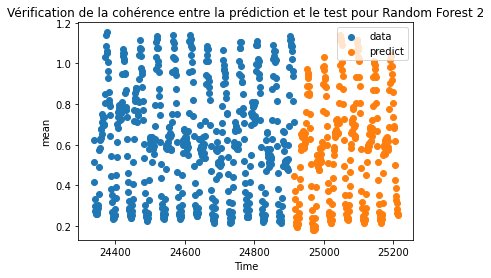

In [103]:
#test du modèle et cohérence de la prédiction

df_knn=data[data['Posan']>340]

#on va tracer 'mean' sur la journée, donc en fonction des 'Time'
Abscisse=df['Time'].values.reshape(-1,1)
donnes_test=df[['TempMax','Instant','WindSpeed']]
resultats_test=df['mean'].values.reshape(-1,1)

plt.scatter(Abscisse,resultats_test,label='data')
plt.title("Vérification de la cohérence entre la prédiction et le test pour Random Forest 2")


#on trace maintenant la prédiction du modèle KNN

abscisse=data_predict['Time'][1:300].values.reshape(-1,1)
resultat_predict=model_forest_2.predict(data_predict[['TempMax','Instant','WindSpeed']][1:300])

plt.scatter(abscisse,resultat_predict,label='predict')
plt.xlabel('Time')
plt.ylabel('mean')
plt.legend()